In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження датасету Heart Disease, що містить медичні дані пацієнтів

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv(url, names=columns, na_values='?')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Перевірка пропущених значень

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

# Видалення дублікатів, заповнення пропущених значень медіаною, перетворення target у бінарний формат

In [7]:
df.drop_duplicates(inplace=True)

df['ca'] = df['ca'].fillna(df['ca'].median())
df['thal'] = df['thal'].fillna(df['thal'].median())

df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print(df.isnull().sum())
df.describe()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


# Залежність віку від максимального пульсу

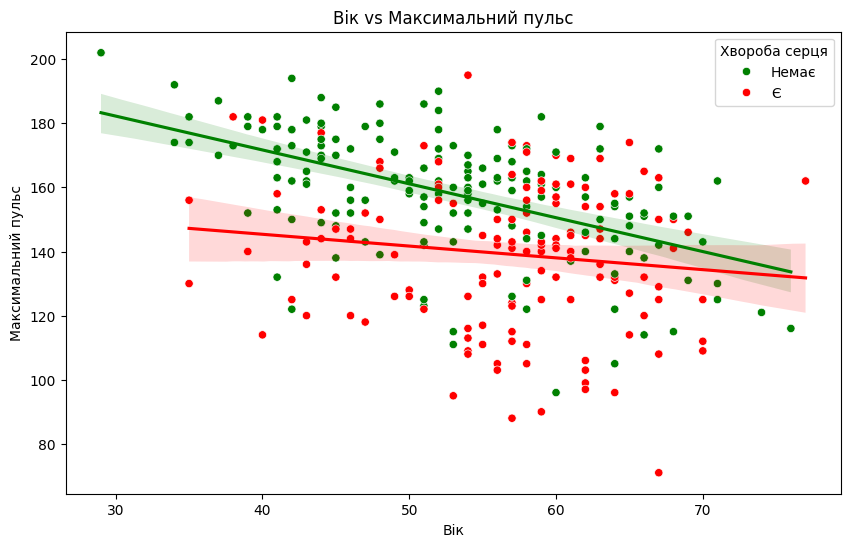

In [17]:
df['Хвороба серця'] = df['target'].map({0: 'Немає', 1: 'Є'})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='Хвороба серця', palette={'Немає': 'green', 'Є': 'red'})
sns.regplot(data=df[df['target']==0], x='age', y='thalach', scatter=False, color='green')
sns.regplot(data=df[df['target']==1], x='age', y='thalach', scatter=False, color='red')
plt.title('Вік vs Максимальний пульс')
plt.xlabel('Вік')
plt.ylabel('Максимальний пульс')
plt.show()

# Графік середнього рівню холестерину за віком

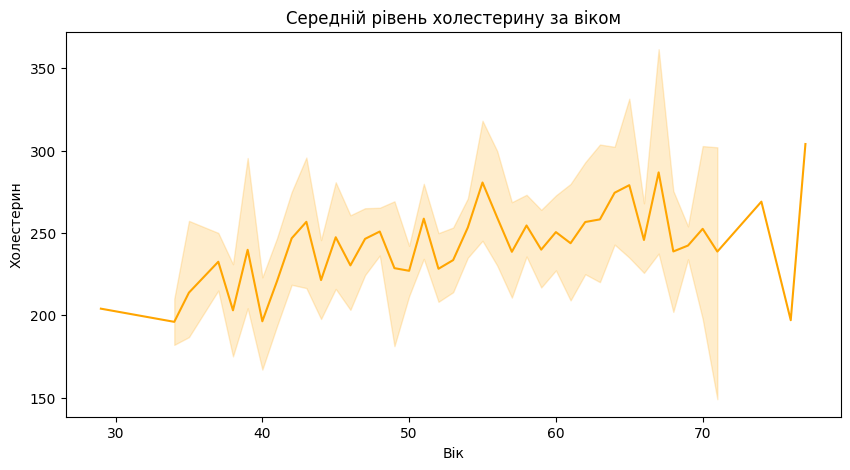

In [9]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='age', y='chol', color='orange')
plt.title('Середній рівень холестерину за віком')
plt.xlabel('Вік')
plt.ylabel('Холестерин')
plt.show()

# Гістограма з 5 віковими діапазонами

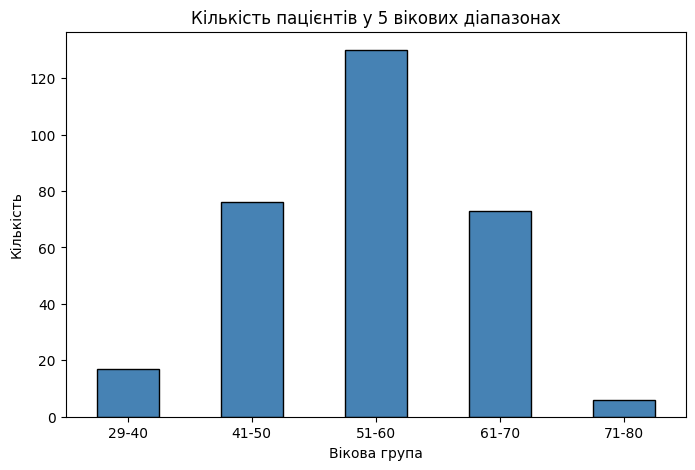

In [11]:
bins = [29, 40, 50, 60, 70, 80]
labels = ['29-40', '41-50', '51-60', '61-70', '71-80']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

plt.figure(figsize=(8, 5))
df['age_group'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Кількість пацієнтів у 5 вікових діапазонах')
plt.xlabel('Вікова група')
plt.ylabel('Кількість')
plt.xticks(rotation=0)
plt.show()

# Кореляційна матриця числових атрибуів
# Значення від -1 до 1
# 1 - сильний позитивний зв'язок, -1 - сильний негативний, 0 - зв'язку немає

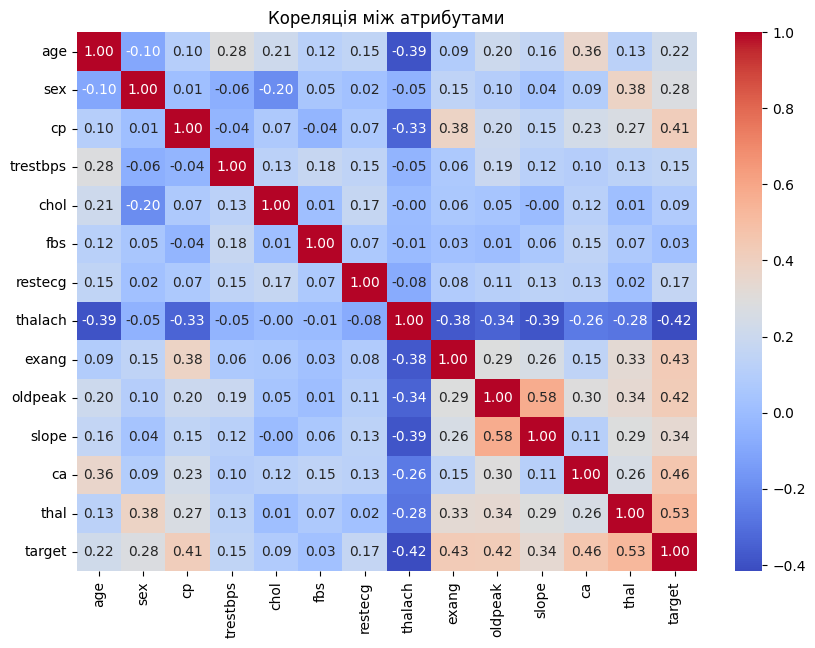

In [12]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes('number').corr(), annot=True,cmap='coolwarm', fmt='.2f')
plt.title('Кореляція між атрибутами')
plt.show()

# Розподіл холестерину залежно від наявності хвороби серця

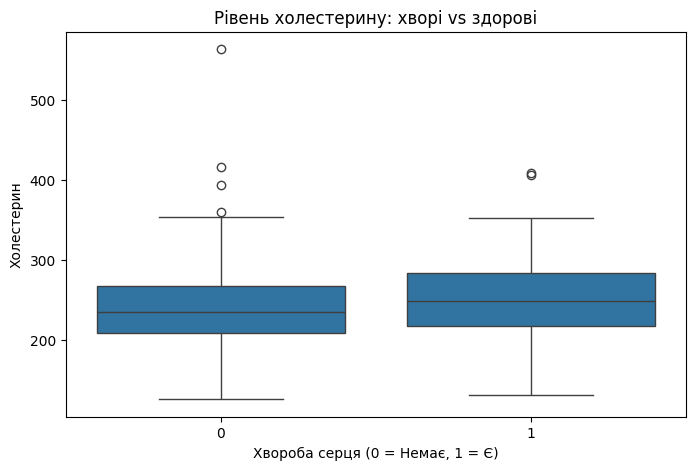

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='target', y='chol')
plt.title('Рівень холестерину: хворі vs здорові')
plt.xlabel('Хвороба серця (0 = Немає, 1 = Є)')
plt.ylabel('Холестерин')
plt.show()

# Показує скільки чоловіків та жінок мають або не мають хворобу серця

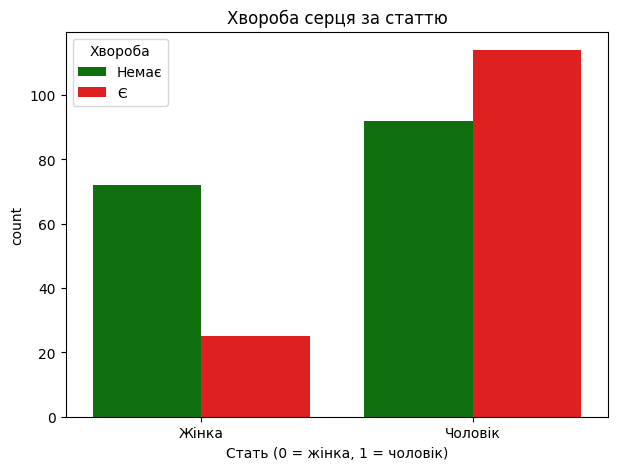

In [14]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='sex', hue='target', palette={0: 'green', 1: 'red'})
plt.title('Хвороба серця за статтю')
plt.xlabel('Стать (0 = жінка, 1 = чоловік)')
plt.xticks([0, 1], ['Жінка', 'Чоловік'])
plt.legend(title='Хвороба', labels=['Немає', 'Є'])
plt.show()

# Показує медіану і розподіл даних по всьому діапазону значень

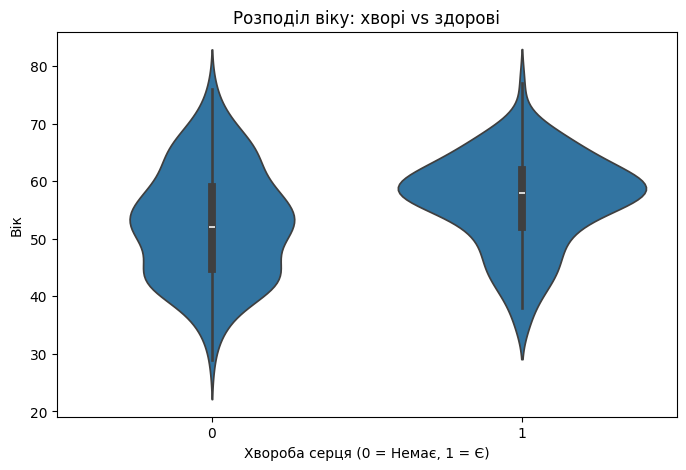

In [16]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='target', y='age')
plt.title('Розподіл віку: хворі vs здорові')
plt.xlabel('Хвороба серця (0 = Немає, 1 = Є)')
plt.ylabel('Вік')
plt.show()